## 가설3 - 캠핑장


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import os
os.name

'nt'

In [ ]:
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

### 3.가설: 캠핑장으로 유입되는 차량이 많을 것이다.
##### - 가장 많은 3곳의 통행량의 변화 살펴보기

In [ ]:
camping_a = pd.read_csv("수도권_캠핑장지표.csv",encoding='cp949') 
camping_a.fillna(0)


,캠핑(야영)장명,소재지도로명주소,야영사이트수,이용시간,이용요금,데이터기준일자,지역
0,동화카라반,가평군 가평읍 가화로 440-151,13.0,0,0,2019-09-08,가평
1,칼봉산카라반캠핑장,가평군 가평읍 경반안로 229,10.0,0,0,2019-09-08,가평
2,베스트캠핑장,가평군 가평읍 금대리 302-10,18.0,0,0,2019-09-08,가평
3,글램바오캠핑장,가평군 가평읍 금대리 302-15,6.0,0,0,2019-09-08,가평
4,아담펜션&캠핑장,가평군 가평읍 당목가일길 410-68,7.0,0,0,2019-09-08,가평
...,...,...,...,...,...,...,...
552,힐링캠프글램핑,인천 중구 늘목로 38,14.0,0,0,2019-06-03,인천
553,락인뜰,인천 중구 늘목로 38,23.0,0,0,2019-06-03,인천
554,섬뜰아래,인천 중구 대무의로 229,15.0,0,0,2019-06-03,인천
555,왕산가족오토캠핑장,인천 중구 용유서로423번길 42,75.0,0,0,2019-06-03,인천


In [ ]:
camping_b = pd.read_csv("캠핑장 지역코드.csv",encoding='cp949') 
list_data = [1,2,3,4,5]
camping_b.head()

,지역코드,지역
0,1,가평
1,2,고양
2,3,과천
3,4,광명
4,5,광주


In [ ]:
camping_c = pd.merge(camping_a, camping_b, on='지역', how='inner')
camping_d = camping_c.groupby('지역')['지역코드'].count()

camping_d = pd.DataFrame(camping_d, columns = ['지역코드'])
camping_e = camping_d.sort_values('지역코드', ascending=False)
camping_e.head(3)

,지역코드
지역,
가평,142
포천,100
양평,43


### 가장 많은 곳은 가평이다

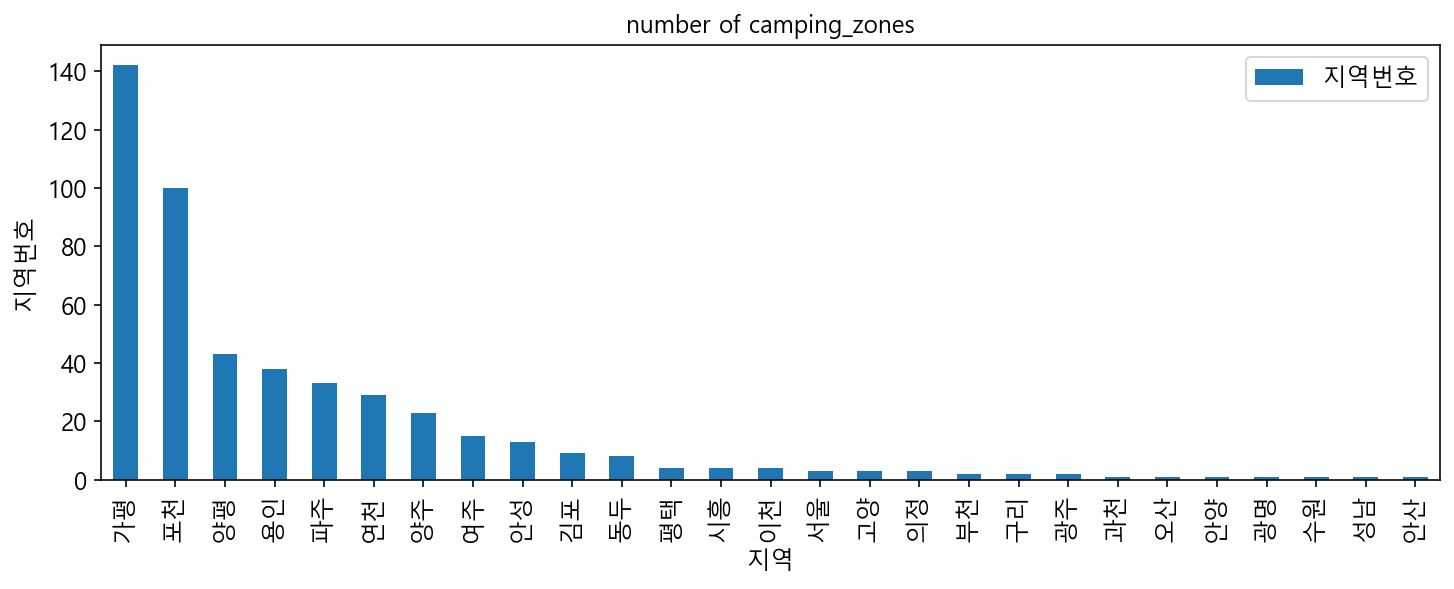

In [ ]:
ax = camping_e.plot(kind='bar', title='number of camping_zones', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('지역', fontsize=12)          # x축 정보 표시
ax.set_ylabel('지역번호', fontsize=12)     # y축 정보 표시
ax.legend(['지역번호'], fontsize=12)    # 범례 지정

### 가평을 가기 위해 지나는 ic
#### 19년의 평균 차량 수와 
#### 20년의 차량 수

In [ ]:
traffic_2019 = pd.read_csv("traffic_2019.csv",encoding='cp949') 

df = traffic_2019
traffic_19_34 = df[["구간","mar","apr"]]
traffic_19_34sum = traffic_19_34.groupby("구간")[["mar", "apr"]].sum()

traffic_19 = traffic_19_34sum.T  # 남양주~화도 구간 3월, 4월의 일평균 통행차량(차종 합산)
traffic_19

구간,남양주~화도
mar,10791
apr,10124


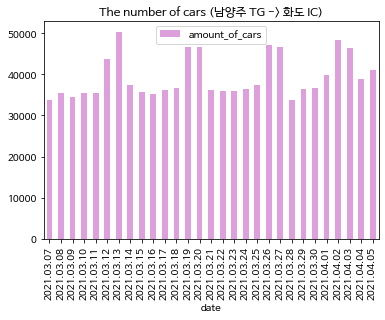

In [4]:
data = pd.read_csv('/content/drive/MyDrive/kaggle/교통빅데이터/구간교통량OpenOASIS.csv', encoding = 'cp949')
data['amount_of_cars']= data['amount_of_cars'].apply(lambda x: x.replace(',', ''))
data['amount_of_cars']= data['amount_of_cars'].astype('float')
data.plot(kind = 'bar', x = 'date', y = 'amount_of_cars',title = 'The number of cars (남양주 TG -> 화도 IC)',color = 'plum')


### 20년의 차량 수가 월등히 높은 것을 알 수 있다